In [ ]:
import pandas as pd
import numpy as np
from numpy import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder 

In [ ]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

society         5502
balcony          609
bath              73
size              16
location           1
price              0
total_sqft         0
availability       0
area_type          0
dtype: int64

##Cleaning and Processing the Data

In [ ]:
bal=df['balcony'].mean()
bat=df['bath'].mean()

In [ ]:
print(round(bal))
print(round(bat))

2
3


In [ ]:
df['balcony']=df['balcony'].fillna(round(bal))
df['bath']=df['bath'].fillna(round(bat))

In [ ]:
df.isnull().sum().sort_values(ascending=False)

society         5502
size              16
location           1
price              0
balcony            0
bath               0
total_sqft         0
availability       0
area_type          0
dtype: int64

In [ ]:
df=df.drop(['society'],axis=1)

In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 8)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

size            16
location         1
price            0
balcony          0
bath             0
total_sqft       0
availability     0
area_type        0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

price           0
balcony         0
bath            0
total_sqft      0
size            0
location        0
availability    0
area_type       0
dtype: int64

In [ ]:
df.shape

(13303, 8)

In [ ]:
temp=[]

for i in df['size']:
  j=i.split(" ")
  temp.append(int(j[0]))

df['size']=temp

In [ ]:
temp=[]
for i in df['total_sqft']:
  if "Sq. Meter" in i:
    temp.append(float(i.split("S")[0])*(10.7639))
  elif "Perch" in i:
    temp.append(float(i.split("P")[0])*(272.25))
  elif "Sq. Yards" in i:
    temp.append(float(i.split("S")[0])*(9))
  elif "Acres" in i:
    temp.append(float(i.split("A")[0])*(43560))
  elif "Guntha" in i:
    temp.append(float(i.split("G")[0])*(1088.9848169))
  elif "Cents" in i:
    temp.append(float(i.split("C")[0])*(435.6))
  elif "Grounds" in i:
    temp.append(float(i.split("G")[0])*(2400))
  elif "-" in i:
    a,b=i.split("-")
    temp.append((float(a)+float(b))/2)
  else:
    temp.append(float(i))

df['total_sqft']=temp

In [ ]:
df['total_sqft'].head()

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float64

In [ ]:

temp=[]
for i in df['availability']:
  if(i != 'Ready To Move' and i!='Immediate Possession'):
    temp.append('Date_Given')
  else:
    temp.append(i)

df['availability']=temp


In [ ]:
le = LabelEncoder() 
  
df['area_type']= le.fit_transform(df['area_type']) 
df['availability']= le.fit_transform(df['availability'])
df['location']= le.fit_transform(df['location'])

In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,0,419,2,1056.0,2.0,1.0,39.07
1,2,1,317,4,2600.0,5.0,3.0,120.00
2,0,1,1178,3,1440.0,2.0,3.0,62.00
3,3,1,756,3,1521.0,3.0,1.0,95.00
4,3,1,715,2,1200.0,2.0,1.0,51.00


##Exercise 1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df['price']
x=df.drop(['price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

##Exercise 2

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
r2=r2_score(y_test,y_pred)
print("r2 score is :",r2)

r2 score is : 0.26728238777424396


In [ ]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Square Error is :",mse)

Mean Square Error is : 9636.361563859158


##Exercise 3

In [ ]:
import seaborn as sns

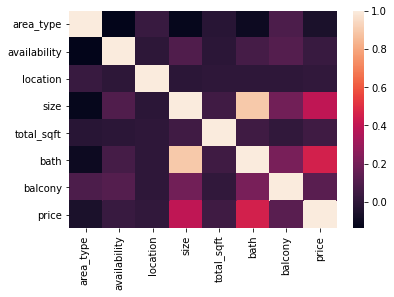

In [ ]:
sns.heatmap(df.corr())